In [1]:
MERCHAINDISE = 'DOTUSDT'
DAYS = 10

# format = YYYY-MM-DD
START_DATE = '2022-4-1'
END_DATE = '2022-4-6'

DATE_FORMAT = "%Y-%m-%d"

In [3]:
from myenv.models.candlestick import Candlestick
from myenv.models.merchandise_rate import MerchandiseRate
from apps.helpers.draw_chart import draw_candlestick
from apps.services.ochl_dataframe import add_hour_column, add_return_column, add_average_oc_column, add_rolling_average_oc_column
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC", start_date=START_DATE, end_date=END_DATE)

data_prices = candlestick.to_df()

data_prices = add_hour_column(data_prices)
data_prices = add_return_column(data_prices)
data_prices = add_average_oc_column(data_prices)
data_prices = add_rolling_average_oc_column(data_prices)

draw_candlestick(data_prices).show()



2022-04-06 15:22:11.960 WARNING matplotlib.legend: No handles with labels found to put in legend.


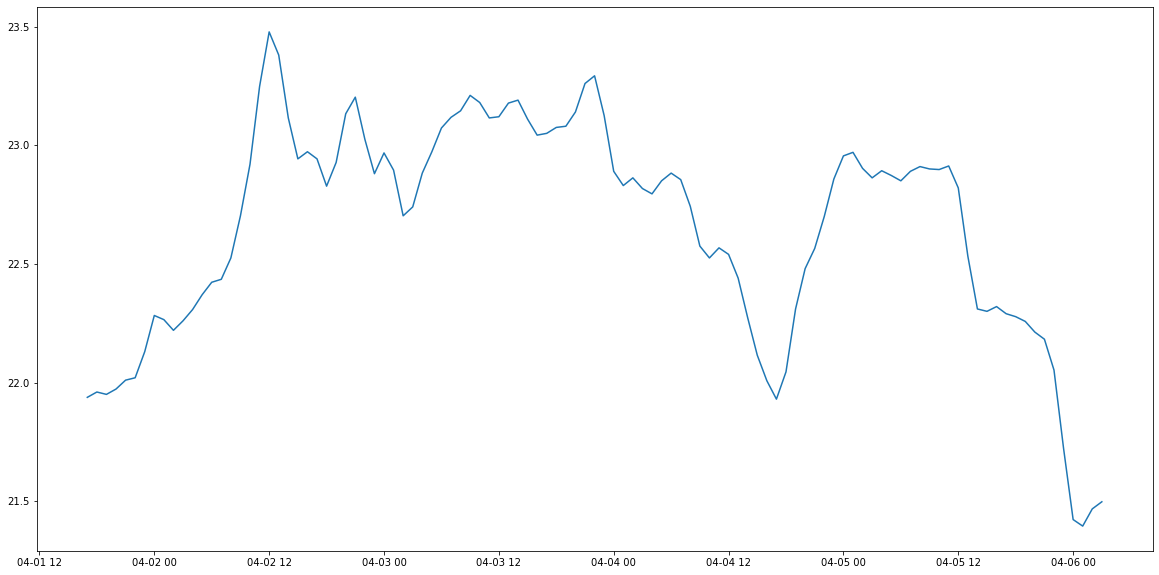

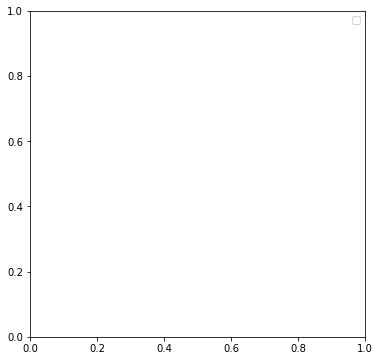

In [12]:
plt.figure(figsize=(20,10))
plt.plot(data_prices['rolling_average_oc'], label='rolling_avg')
plt.figure(figsize=(6, 6))

plt.legend()

plt.show()

2022-04-06 15:29:25.500 WARNING matplotlib.legend: No handles with labels found to put in legend.


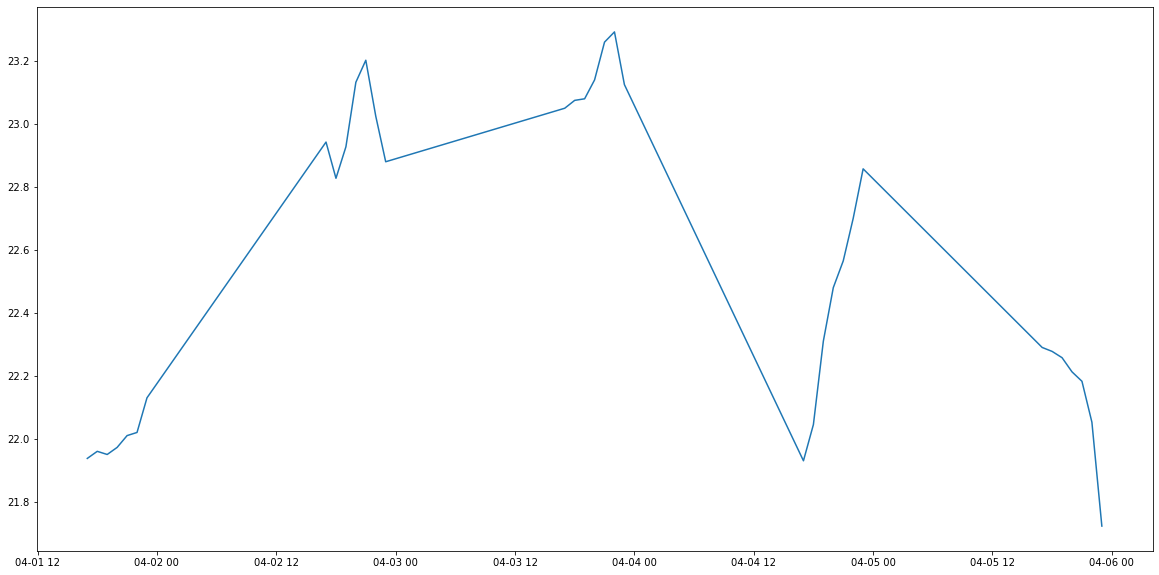

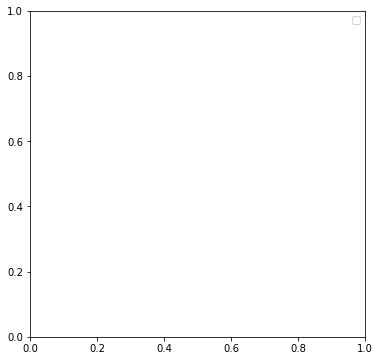

In [16]:
data_prices_0_6 = data_prices[data_prices['hour'] < 7]

plt.figure(figsize=(20,10))
plt.plot(data_prices_0_6['rolling_average_oc'], label='rolling_avg')
plt.figure(figsize=(6, 6))

plt.legend()

plt.show()